In [14]:
from qiskit import *
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex ,plot_state_qsphere

In [ ]:
qr = QuantumRegister(3) # quantum register with 3 qubit
cr = ClassicalRegister(1) # classical register with 1 classical bit (we need it store measurement results)
circuit = QuantumCircuit(qr, cr) #Creates a new quantum circuit with the specified quantum register (qr) for qubits and classical register (cr) for measurement results 

circuit.h(2) #To use pauli-x or NOT gate in this quibit, we call x method on circuit, and pass the parameter 0, which corresponds to the index of our first  quibit (in this case we have only one quibit) 
circuit.cx(2,1)
circuit.cx(2,0)
# circuit.measure(0)
circuit.measure_all()
# print(circuit)
circuit.draw()


┌───┐┌─┐
q9_0: ──────────┤ X ├┤M├
           ┌───┐└─┬─┘└╥┘
q9_1: ─────┤ X ├──┼───╫─
      ┌───┐└─┬─┘  │   ║ 
q9_2: ┤ H ├──■────■───╫─
      └───┘           ║ 
c9: 1/════════════════╩═
                      0

Measurement results: {'0': 503, '1': 521}


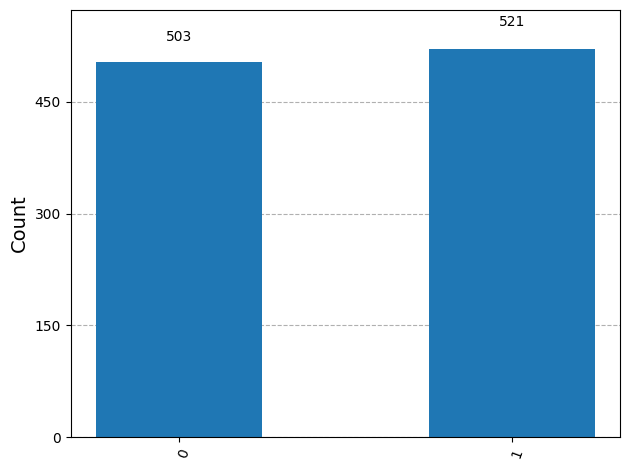

In [21]:
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator') ## Create a basic quantum simulator
compiled_circuit = transpile(circuit, simulator) ## Transpile the circuit for the simulator
result = simulator.run(compiled_circuit, shots=1024).result() #Run the circuit multiple times (shots), Each shot represents one execution of the circuit 
# Print the raw measurement counts
print("Measurement results:", result.get_counts())
# Plot the histogram of measurement outcomes

plot_histogram(result.get_counts())

In [18]:
# from qiskit.quantum_info import Statevector
# from qiskit.visualization import plot_bloch_multivector
# circuit.remove_final_measurements()  # no measurements allowed
# from qiskit.quantum_info import Statevector
# statevector = Statevector(circuit)
# plot_bloch_multivector(statevector)